# Laboratory 3

In [65]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
def load():
    return sklearn.datasets.load_iris()['data'].T, sklearn.datasets.load_iris()['target']

def to_col(row):
    return row.reshape(row.size, 1)

In [66]:
D,labels = load() # load dataset and labels

In [67]:
mu = D.mean() # mean of all the elements of the dataset, sum of D[i,j]/D.size
mu

3.4644999999999997

In [68]:
mu = D.mean(axis=1) # mean of all the columns of the dataset
# it is a row vector, i have to reshape it to a column vector
mu = to_col(mu)
mu

array([[5.84333333],
       [3.05733333],
       [3.758     ],
       [1.19933333]])

In [69]:
D_centered = D - mu
N = np.shape(D)[1] #150
C = 1/N * np.dot(D_centered, D_centered.T)
print('C = ',C)
print('mu = ',mu)

C =  [[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]
mu =  [[5.84333333]
 [3.05733333]
 [3.758     ]
 [1.19933333]]


In [70]:
s, U = np.linalg.eigh(C) # compute eigenvalues and eigenvectors of C
print('s = ',s) # s are sorted from the smallest to the largest
print('U = ',U) # U is made by row vectors that are the eigenvectors of C

s =  [0.02367619 0.0776881  0.24105294 4.20005343]
U =  [[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


In [71]:
m = 2
P = U[:, ::-1][:, 0:m]
P

array([[-0.36138659,  0.65658877],
       [ 0.08452251,  0.73016143],
       [-0.85667061, -0.17337266],
       [-0.3582892 , -0.07548102]])

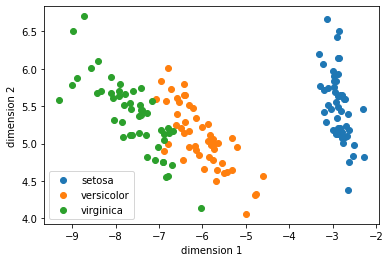

In [80]:
y = np.dot(P.T, D)
setosa = y[:,labels == 0]
versicolor = y[:,labels == 1]
virginica = y[:,labels == 2]
plt.scatter(setosa[0,:], setosa[1,:])
plt.scatter(versicolor[0,:], versicolor[1,:])
plt.scatter(virginica[0,:], virginica[1,:])
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

In [81]:
# given a dataset X and the parameter m it computes the projection matrix P
def projection_PCA(X,m):
    mu = D.mean(axis = 1).reshape(-1,1)
    Xc = X - mu
    K = np.shape(X)[1] # number of columns of X
    C = 1/K * np.dot(Xc, Xc.T) # covariance matrix
    sigma, U = np.linalg.eigh(C)
    P = U[:, ::-1][:, 0:m] # take the m eigenvectos of C associated to the m highest eigenvalues
    return P

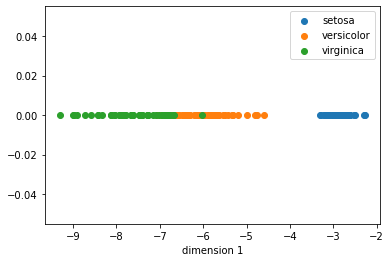

In [98]:
P = projection_PCA(D,1)
y = np.dot(P.T, D)
setosa = y[:,labels == 0]
versicolor = y[:,labels == 1]
virginica = y[:,labels == 2]
setosa
plt.scatter(setosa[0,:],np.zeros((1,np.shape(setosa)[1])))
plt.scatter(versicolor[0,:],np.zeros((1,np.shape(versicolor)[1])))
plt.scatter(virginica[0,:],np.zeros((1,np.shape(virginica)[1])))
plt.xlabel('dimension 1')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

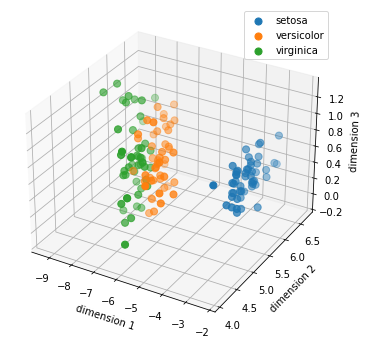

In [123]:
P = projection_PCA(D,3)
y = np.dot(P.T, D)
setosa = y[:,labels == 0]
versicolor = y[:,labels == 1]
virginica = y[:,labels == 2]
fig = plt.figure()
fig.set_size_inches(6,6)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(setosa[0,:],setosa[1,:],setosa[2,:],s=50*np.ones((1,50)))
ax.scatter(versicolor[0,:],versicolor[1,:],versicolor[2,:],s=50*np.ones((1,50)))
ax.scatter(virginica[0,:],virginica[1,:],virginica[2,:],s=50*np.ones((1,50)))
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')
ax.set_zlabel('dimension 3')
ax.legend(['setosa','versicolor','virginica'])